In [80]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

In [81]:
df = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/Case Study 3/MPS_cleanv2.csv')
df.drop(['Unnamed: 0', 'A', 'Location'], axis=1, inplace=True)
#df.replace({'Location': {'A': 0, 'B': 1}}, inplace=True)

X = df.drop('Target', axis=1)
y = df.Target

df

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.31,9.4,0.99330,69.0,5.8,1.80,0.230,3.38,0.27,0.043,24.0,0,1
5291,0.35,9.2,0.99240,30.0,5.6,0.80,0.290,3.36,0.05,0.038,11.0,0,1
5292,0.74,11.5,0.99780,14.0,11.6,3.65,0.530,3.05,0.66,0.121,6.0,1,0
5293,0.53,10.5,0.99860,21.0,11.1,3.10,0.350,3.17,0.48,0.090,5.0,0,0


Step 1: Standardization

Un-standardized data is sensitive to the variances of the initial variables. The variables with larger ranges dominates over those with small ranges (a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which leads to biased results. Transforming the data to comparable scales prevents this problem.

Mathematically, this can be done by subtracting the mean (or emperical mean - sample mean of each column shifted to zero) and dividing by the standard deviation for each value of each variable.

In [82]:
X = StandardScaler().fit_transform(X)

Step 2: Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [83]:
X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00018889 -0.01901135  0.28309555 -0.27544075  0.30710181 -0.17469636
   0.22657968  0.16617036  0.06213262  0.40584754 -0.19904241 -0.48952165]
 [-0.01901135  1.00018889 -0.66907612 -0.24782613 -0.10367697 -0.30536825
  -0.06679364  0.09663375 -0.00512536 -0.27024659 -0.1698856   0.06013648]
 [ 0.28309555 -0.66907612  1.00018889  0.00597503  0.47901051  0.5202925
   0.30847434  0.03498585  0.09584239  0.37219668  0.0058279  -0.43003464]
 [-0.27544075 -0.24782613  0.00597503  1.00018889 -0.32869321  0.48762594
  -0.40130643 -0.22204506  0.19426742 -0.27005976  0.72144388  0.6944606 ]
 [ 0.30710181 -0.10367697  0.47901051 -0.32869321  1.00018889 -0.10610422
   0.21656444 -0.26967477  0.32931385  0.28995787 -0.28207801 -0.48830474]
 [-0.17469636 -0.30536825  0.5202925   0.48762594 -0.10610422  1.00018889
  -0.16446951 -0.23336265  0.14655559 -0.12313831  0.39965482  0.32917265]
 [ 0.22657968 -0.06679364  0.30847434 -0.40130643  0.21656444 -0.16446951
   1.00018889 

Next, we perform an eigendecomposition on the covariance matrix:

All the three approaches yield the same eigenvectors and eigenvalue pairs:

Eigendecomposition of the covariance matrix after standardizing the data.

Eigendecomposition of the correlation matrix.

Eigendecomposition of the correlation matrix after standardizing the data.

In [84]:
import numpy as np
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.90495822e-01  1.10922708e-01 -9.56944744e-02 -6.30718649e-01
  -4.49177930e-02  1.09468887e-01 -5.67086468e-02 -1.94706656e-01
   1.39146899e-01  2.51433099e-01 -5.54680235e-01  2.25757968e-01]
 [ 1.88789506e-02 -4.65196506e-01 -2.60244259e-01 -9.58484396e-02
   3.21393441e-01 -1.33516161e-01  2.29443575e-01  1.75294373e-01
   3.04457972e-01  5.44825085e-01  2.98742287e-01  1.51832258e-01]
 [-1.89109814e-01  5.41180133e-01  1.70093074e-01  9.35179153e-02
   7.31224670e-01 -5.50573482e-02  6.48225519e-02  6.91119791e-02
   2.82467404e-01 -8.46268005e-02  7.04023722e-04 -5.91636413e-03]
 [ 4.03905479e-01  2.28398970e-01  1.33808303e-01 -1.99721172e-01
  -5.37367007e-02 -5.42253086e-01  4.47528189e-01 -3.94663208e-01
  -1.09675287e-01  1.62295021e-01 -2.42147195e-03 -1.88574362e-01]
 [-2.69884090e-01  2.61563330e-01 -4.37860630e-01  1.95995629e-01
  -2.80262352e-01  2.15197709e-01  4.90036457e-01  1.39034514e-01
   1.60285041e-01  1.05202905e-01 -8.19064807e-02 -4.48129

Singular Value Decomposition 

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [85]:
u,s,v = np.linalg.svd(X.T)
u

array([[-2.90495822e-01, -1.10922708e-01,  9.56944744e-02,
        -6.30718649e-01, -1.39146899e-01,  2.51433099e-01,
        -2.25757968e-01, -5.54680235e-01,  1.94706656e-01,
        -5.67086468e-02,  1.09468887e-01,  4.49177930e-02],
       [ 1.88789506e-02,  4.65196506e-01,  2.60244259e-01,
        -9.58484396e-02, -3.04457972e-01,  5.44825085e-01,
        -1.51832258e-01,  2.98742287e-01, -1.75294373e-01,
         2.29443575e-01, -1.33516161e-01, -3.21393441e-01],
       [-1.89109814e-01, -5.41180133e-01, -1.70093074e-01,
         9.35179153e-02, -2.82467404e-01, -8.46268005e-02,
         5.91636413e-03,  7.04023722e-04, -6.91119791e-02,
         6.48225519e-02, -5.50573482e-02, -7.31224670e-01],
       [ 4.03905479e-01, -2.28398970e-01, -1.33808303e-01,
        -1.99721172e-01,  1.09675287e-01,  1.62295021e-01,
         1.88574362e-01, -2.42147195e-03,  3.94663208e-01,
         4.47528189e-01, -5.42253086e-01,  5.37367007e-02],
       [-2.69884090e-01, -2.61563330e-01,  4.3786063

Step 3: Selecting Principal Components

Sorting Eigenpairs 

The goal of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they all have the same unit length 1.

In order to decide which eigenvector(s) can be dropped without losing too much information, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

The common approach is to rank the eigenvalues from highest to lowest.

In [86]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.785945004049297
2.4893628338428724
1.5904251114789179
0.9535800661159175
0.7480132110680487
0.6289913429733289
0.5332937073588345
0.5167758855423911
0.35441983029147767
0.255584022996004
0.11963463628926142
0.026241065031811485


Explained Variance 

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [87]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 31.54358334,  52.28435583,  65.53539539,  73.48039519,
        79.71266138,  84.95326599,  89.39654092,  93.70219332,
        96.65513412,  98.78459874,  99.78136576, 100.        ])

In the above array we see that the first feature explains roughly 31.54% of the variance within our data set while the first two explain 52.8 and so on.

Projection Matrix 

The projection matrix is used to transform the Input data(X) onto the new feature subspace. Projection Matrix is a matrix of concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our 2-dimensional eigenvector matrix .

In [88]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(12,1),
                      eig_pairs[1][1].reshape(12,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.29049582  0.11092271]
 [ 0.01887895 -0.46519651]
 [-0.18910981  0.54118013]
 [ 0.40390548  0.22839897]
 [-0.26988409  0.26156333]
 [ 0.21994107  0.40729368]
 [-0.35787323  0.01510678]
 [-0.16072278 -0.20723316]
 [ 0.10474357  0.23314105]
 [-0.30091743  0.224541  ]
 [ 0.34020771  0.2044399 ]
 [ 0.47325811 -0.04690353]]


Step 4: Projection Onto the New Feature Space


In [89]:
Y = X.dot(matrix_w)

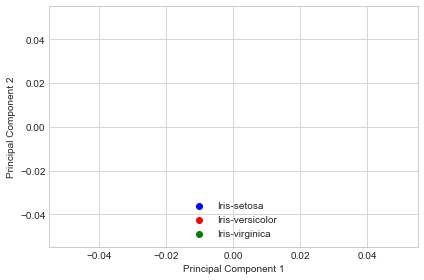

In [90]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Shortcut - PCA in scikit-learn


In [91]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.31543583, 0.20740772])

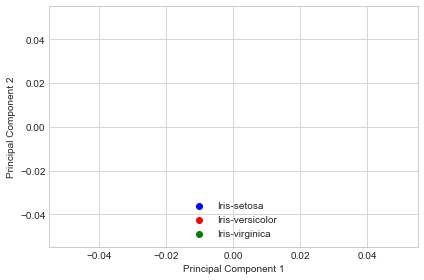

In [92]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Application 2 - PCA to Speed-up Machine Learning Algorithms 


In [93]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [94]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( X, y, test_size=0.2, random_state=0)

In [95]:
from sklearn.decomposition import PCA

# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
pca.fit(train_img)
print(pca.n_components_)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

154


Incremental PCA 

PCA requires the whole training set to fit in memory. Incremental PCA splits the training set into mini-batches. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [96]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(train_img, n_batches):
        inc_pca.partial_fit(X_batch)
        
X_mnist_reduced = inc_pca.transform(train_img)

PCA_2

In [97]:
X_std = StandardScaler().fit_transform(df)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00018889 -0.01901135  0.28309555 -0.27544075  0.30710181 -0.17469636
   0.22657968  0.16617036  0.06213262  0.40584754 -0.19904241  0.03756408
  -0.48952165]
 [-0.01901135  1.00018889 -0.66907612 -0.24782613 -0.10367697 -0.30536825
  -0.06679364  0.09663375 -0.00512536 -0.27024659 -0.1698856   0.41868414
   0.06013648]
 [ 0.28309555 -0.66907612  1.00018889  0.00597503  0.47901051  0.5202925
   0.30847434  0.03498585  0.09584239  0.37219668  0.0058279  -0.29440549
  -0.43003464]
 [-0.27544075 -0.24782613  0.00597503  1.00018889 -0.32869321  0.48762594
  -0.40130643 -0.22204506  0.19426742 -0.27005976  0.72144388 -0.06776244
   0.6944606 ]
 [ 0.30710181 -0.10367697  0.47901051 -0.32869321  1.00018889 -0.10610422
   0.21656444 -0.26967477  0.32931385  0.28995787 -0.28207801 -0.04988043
  -0.48830474]
 [-0.17469636 -0.30536825  0.5202925   0.48762594 -0.10610422  1.00018889
  -0.16446951 -0.23336265  0.14655559 -0.12313831  0.39965482 -0.0839855
   0.32917265]
 [ 0.

In [98]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.28920981 -0.07140354 -0.15069872 -0.5181007  -0.04643236  0.11101397
   0.30240814 -0.05551496 -0.15697551 -0.05021185 -0.33159978 -0.1634426
   0.58929932]
 [-0.03324901  0.48161349 -0.22519178 -0.12552456  0.31595021 -0.12471501
  -0.15784555  0.24306524  0.26744253  0.08919401 -0.30211551  0.56132388
   0.12353764]
 [ 0.20086256 -0.51889123  0.08160692 -0.1321418   0.73250073 -0.05493761
  -0.2836981   0.06429029  0.05440176 -0.18729445  0.04403358 -0.03888915
  -0.0245271 ]
 [-0.39745095 -0.24108161  0.10104617 -0.17048831 -0.05174566 -0.5437301
   0.14656868  0.44278308 -0.39229206  0.13904399 -0.21234222  0.01626811
  -0.10097718]
 [ 0.27193246 -0.21342027 -0.45925097  0.12756158 -0.28127488  0.2158065
  -0.21224345  0.4908843   0.12184505 -0.04670861 -0.33056078 -0.1889143
  -0.2821905 ]
 [-0.21169249 -0.39551243  0.09903718 -0.15343654 -0.44079104  0.05453444
  -0.49209495 -0.00884409  0.17669883 -0.01977173  0.13507575  0.3667622
   0.37619849]
 [ 0.35954588

In [99]:
#Visually confirm that the list is correctly sorted by decreasing eigenvalues

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.795879768915108
2.618141916266158
1.6483147699507266
1.0523753255612263
0.870469848492168
0.687520687691836
0.5545352000805721
0.5265611979111834
0.5031466556321748
0.3446456377443816
0.2553617355275442
0.1194250783686473
0.02607778798294577


In [100]:
pca = PCA(n_components=2)
pca.fit_transform(df)
print(pca.explained_variance_ratio_)

[0.95422017 0.04058487]


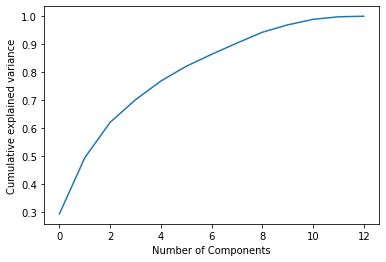

In [101]:
#Explaines variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

The above plot shows almost 90% variance by the first 8 components. Therfore we can drop 4th component.

Things to consider when using PCA:-

1) Scale feature before applying PCA

2) Accuracy might drop

3) Not the best option for categorial/binary target variable

4) Data set should be int or flat data type

In [102]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

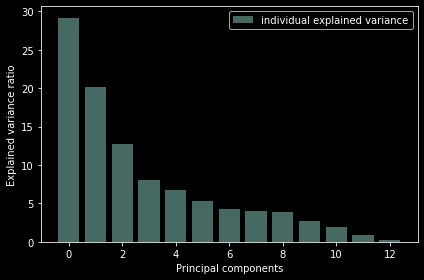

In [104]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(13), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance is ~ 28% based on the first principal component alone. The second,third,fourth and fifth principal component share drop significantly from 20% to 8%. 6th to 9th components share equal amounts which could contribute to the predictive power of the final model. But we can drop the last 4 component as it has less than 10% of the variance.